# The Sparks Foundation Task 3

**Task: Exploratory Data Analysis- Retail**

Problem Statement: Perform Exploratory Data Analysis (EDA) on dataset ‘SampleSuperstore’. This task focuses on acting as a business manager to find out the weak areas where we can work to make profit.

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

**Importing the dataset**

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
# Display the first few rows of the dataset
print(df.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

In [4]:
df.shape

(9994, 13)

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Dropping duplicates**

In [6]:
df.duplicated().sum()

17

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Checking for null values**

In [9]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB
None


In [11]:
print(df.describe())

        Postal Code         Sales     Quantity     Discount      Profit
count   9977.000000   9977.000000  9977.000000  9977.000000  9977.00000
mean   55154.964117    230.148902     3.790719     0.156278    28.69013
std    32058.266816    623.721409     2.226657     0.206455   234.45784
min     1040.000000      0.444000     1.000000     0.000000 -6599.97800
25%    23223.000000     17.300000     2.000000     0.000000     1.72620
50%    55901.000000     54.816000     3.000000     0.200000     8.67100
75%    90008.000000    209.970000     5.000000     0.200000    29.37200
max    99301.000000  22638.480000    14.000000     0.800000  8399.97600


In [12]:
# Explore the correlation between variables
correlation = df.corr()
print(correlation)

             Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023476  0.013110  0.059225 -0.029892
Sales          -0.023476  1.000000  0.200722 -0.028311  0.479067
Quantity        0.013110  0.200722  1.000000  0.008678  0.066211
Discount        0.059225 -0.028311  0.008678  1.000000 -0.219662
Profit         -0.029892  0.479067  0.066211 -0.219662  1.000000


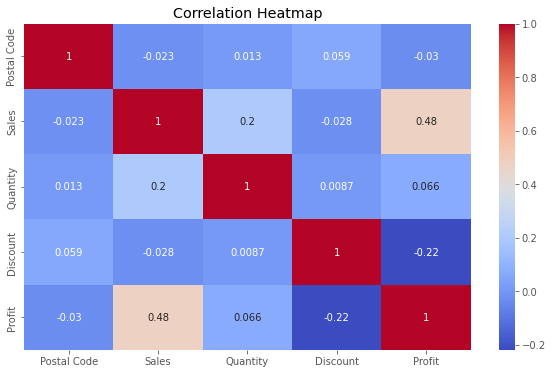

In [13]:
# Visualize the correlation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Perform EDA**

1. Analyze sales by different dimensions

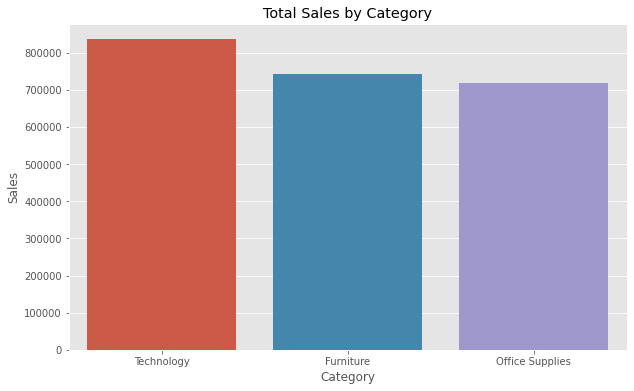

In [14]:
# Sales by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

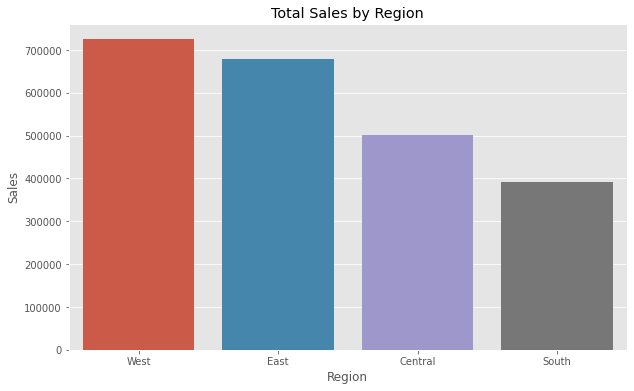

In [15]:
# Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

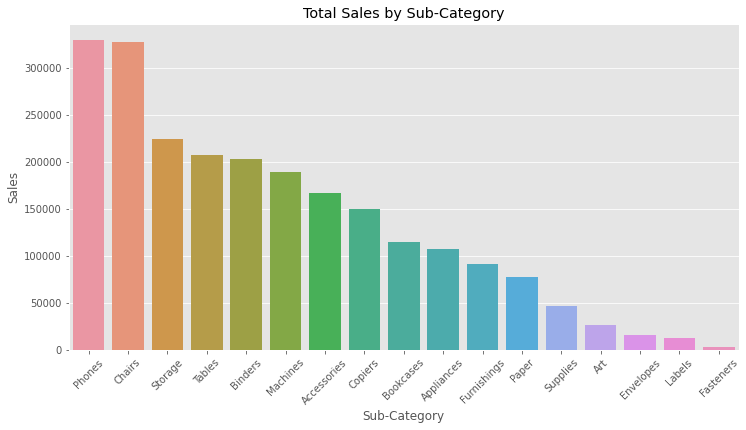

In [16]:
# Sales by Sub-Category
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=subcategory_sales.index, y=subcategory_sales.values)
plt.title("Total Sales by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

2. Analyze profit by different dimensions

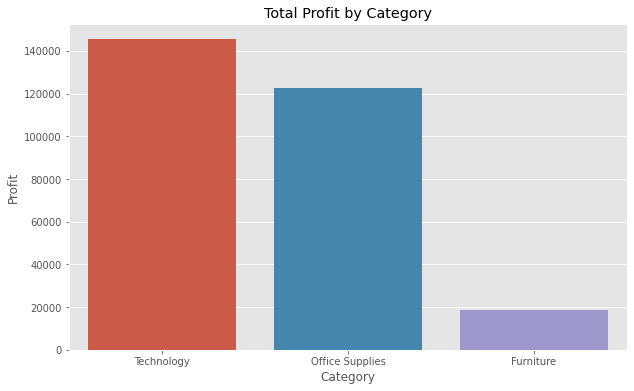

In [17]:
# Profit by Category
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_profit.index, y=category_profit.values)
plt.title("Total Profit by Category")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()

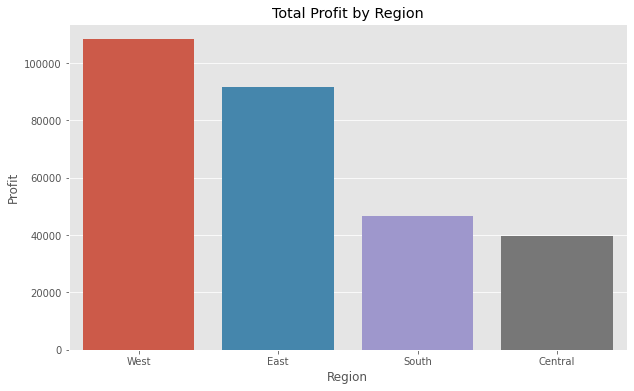

In [18]:
# Profit by Region
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_profit.index, y=region_profit.values)
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.show()

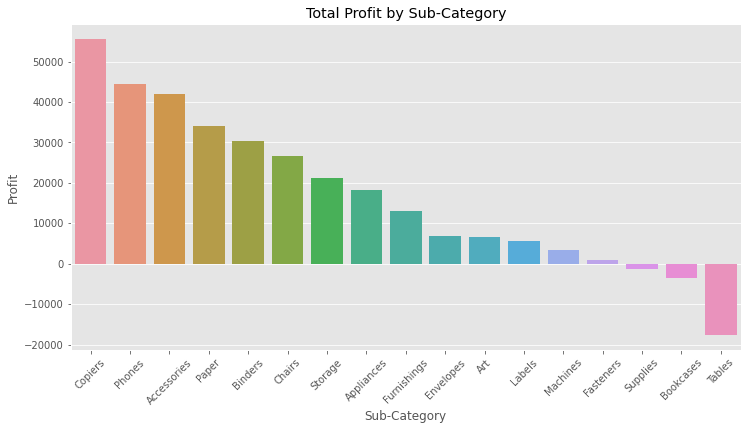

In [19]:
# Profit by Sub-Category
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=subcategory_profit.index, y=subcategory_profit.values)
plt.title("Total Profit by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()

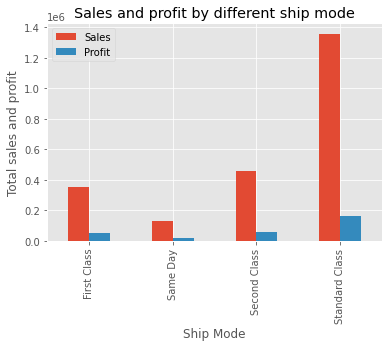

In [20]:
df_ship = df.groupby('Ship Mode')['Sales','Profit'].agg(sum)
df_ship.plot(kind='bar')
plt.title('Sales and profit by different ship mode')
plt.ylabel('Total sales and profit')
plt.show()

The sales and profits on same day ship mode are less.

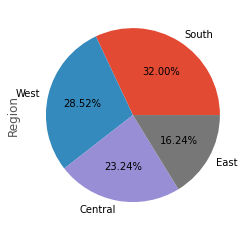

In [22]:
state = df['Region'].value_counts()
labels = df['Region'].unique().tolist()
state.plot(kind='pie',autopct='%0.2f%%',labels=labels)
plt.show()

The sales in the central and east regions are comparatively less than in the south and west region.

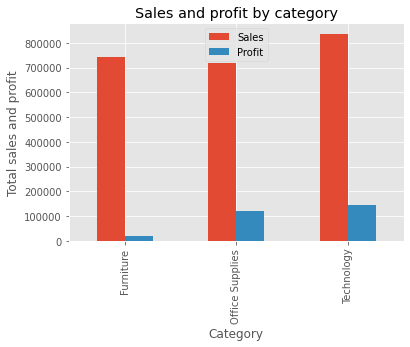

In [23]:
df_ship = df.groupby('Category')['Sales','Profit'].agg(sum)
df_ship.plot(kind='bar')
plt.title('Sales and profit by category')
plt.ylabel('Total sales and profit')
plt.show()

To increase sales, we need to focus on the furniture category.

# Observations and conclusions based on the EDA:


**1. Weak areas where you can work to make more profit:**

- The "Discount" feature shows a negative correlation with the "Profit" column. This suggests that offering higher discounts may lead to lower profits. You can analyze and optimize the discount strategy.
- The "Office Supplies" category has the lowest average profit compared to "Furniture" and "Technology." Focus on improving profitability in this category.

**2. Business problems derived from exploring the data:**

- There is a negative correlation between "Discount" and "Profit." Determine an optimal discount strategy to maximize profits.
- The "Central" region has the lowest average profit. Analyze the reasons behind it and identify potential solutions to improve profitability.
- The "Standard Class" shipping mode is the most common, but it has the lowest average profit compared to other shipping modes. Explore ways to optimize shipping methods and costs.